###Treinamento do Modelo

In [0]:
# todos os imports das bibliotecas
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
#versao do tensorflow
tf.__version__

'2.2.0-rc3'

In [0]:
# alguns parametros par ao treinamento do modelo
batch_size = 128
num_classes = 10
epochs = 100

In [0]:
#definicao do tamanho da imagem que sera aceita
img_rows, img_cols = 28, 28

In [0]:
#carregando o dataset mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
#tratamento das imagens e adequacao para alimentar o modelo
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [20]:
#binariazacao dos datasets de treino e teste
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'amostras de treino')
print(x_test.shape[0], 'amostras de teste')

x_train shape: (60000, 28, 28, 1)
60000 amostras de treino
10000 amostras de teste


In [0]:
#conversao das labels para passar para a rede neural
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#definicao do modelo a ser utilizado: CNN
model = Sequential()
model.add(Conv2D(name="convolution2d_1", filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(name="convolution2d_2", filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(name="maxpooling2d_1", pool_size=[2, 2]))
model.add(Dropout(name="dropout_1", rate=0.25))
model.add(Flatten())
model.add(Dense(name="dense_1", units=128, activation='relu'))
model.add(Dropout(name="dropout_2", rate=0.5))
model.add(Dense(name="dense_2", units=num_classes, activation='softmax'))

In [23]:
# compilaçãão e sumario do modelo
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'], 
              run_eagerly = True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution2d_1 (Conv2D)     (None, 26, 26, 32)        320       
_________________________________________________________________
convolution2d_2 (Conv2D)     (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpooling2d_1 (MaxPooling2D (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
#definicao dos callbacks
weights_filepath = "weights.h5"
callbacks = [ModelCheckpoint(weights_filepath, monitor='val_loss', mode='min',
                             verbose=1, save_best_only=True),
             EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1)]

In [26]:
#treinamento do modelo
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=callbacks)
model.load_weights(weights_filepath)

Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 1.8522 - accuracy: 0.5087
Epoch 00001: val_loss improved from 1.89475 to 1.69499, saving model to weights.h5
469/469 [==============================] - 15s 32ms/step - loss: 1.8522 - accuracy: 0.5087 - val_loss: 1.6950 - val_accuracy: 0.6929
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 1.6886 - accuracy: 0.5612
Epoch 00002: val_loss improved from 1.69499 to 1.49175, saving model to weights.h5
469/469 [==============================] - 15s 32ms/step - loss: 1.6886 - accuracy: 0.5612 - val_loss: 1.4917 - val_accuracy: 0.7278
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 1.5143 - accuracy: 0.5993
Epoch 00003: val_loss improved from 1.49175 to 1.29299, saving model to weights.h5
469/469 [==============================] - 15s 32ms/step - loss: 1.5143 - accuracy: 0.5993 - val_loss: 1.2930 - val_accuracy: 0.7565
Epoch 4/100
469/469 [==============================] - ETA: 0

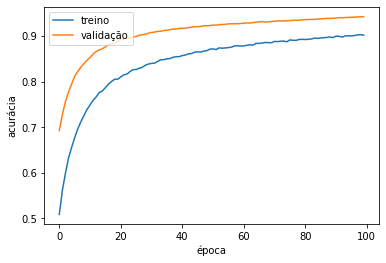

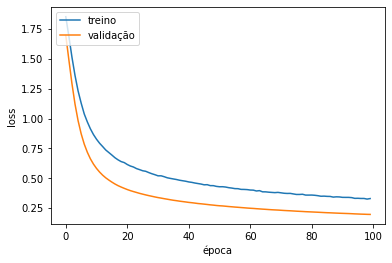

In [32]:
#avaliacao da acuria de treiano e teste
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss em Teste:', score[0])
print('Acurácia em Teste:', score[1])

Loss em Teste: 0.1986618936061859
Acurácia em Teste: 0.9426000118255615


In [0]:
#salvando a estrutura da rede neural
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
#salvando os pesos aprendidos pela rede neural
model.save_weights("model.h5")